# Multiple Linear Regression #

Dataset: Student_Performance.csv

https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:

* Hours Studied: The total number of hours spent studying by each student.
* Previous Scores: The scores obtained by students in previous tests.
* Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
* Sleep Hours: The average number of hours of sleep the student had per day.
* Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
* Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.
The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

Objective
* Explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

### Assignment 1: Exploratory Data Analysis (30 points) ###
* Perform EDA to understand the features of the dataset.
* Visualize the distribution of the target variable.
* Identify and visualize relationships between features and the target variable.

Assignment 1: -----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
-----
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%    

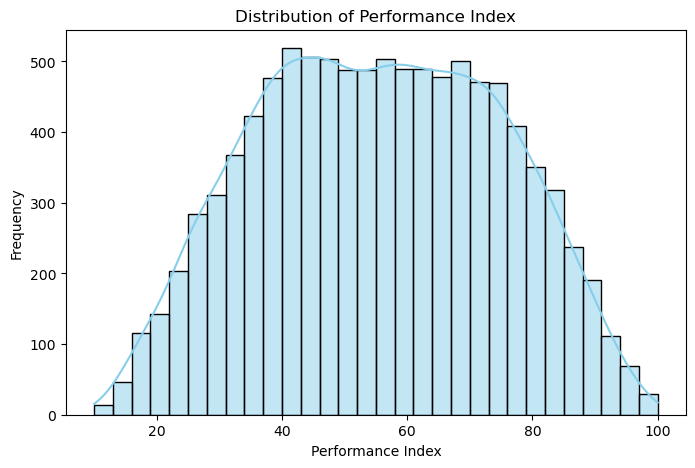

-----


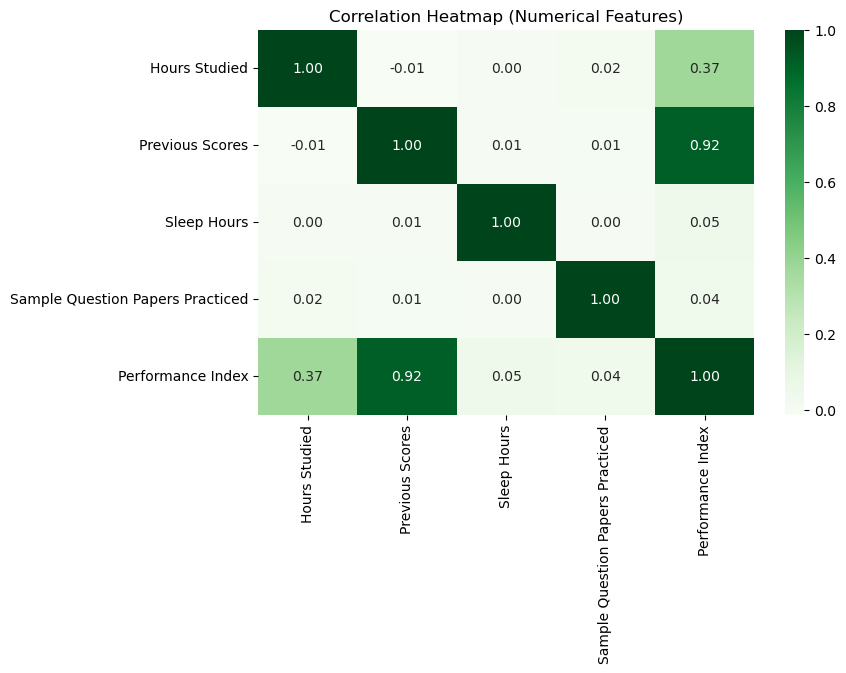

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

file = "Student_Performance.csv"
df = pd.read_csv(file)

# Assignment 1
print("Assignment 1: -----------------")
print(df.info())
print("-----")
print(df.describe())
print("-----")
print(df.head())
print("-----")
print("Missing values:\n", df.isnull().sum())
print("-----")
plt.figure(figsize=(8, 5))
sns.histplot(df["Performance Index"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Frequency")
plt.show()
print("-----")
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Greens", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

### Assignment  2: Data Cleaning (20 points) ###
* Handling Missing Values: Fill in missing data using techniques like mean or median imputation, model-based methods, or drop rows/columns with missing values.
* Removing Outliers: Identify and remove anomalies that can skew the results.

In [37]:
# Assignment 2
print("Assignment 2: -----------------")
df.columns = df.columns.str.strip()
print("Missing values per column:\n", df.isnull().sum())
print("-----")
# Numerical features
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median)
# Categorical features
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
# One-hot encoding (same as Label Encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
bool_cols = df.select_dtypes(include=["bool"]).columns
for col in bool_cols:
    df[col] = df[col].astype(int)
print(df.head())
print("-----")
print("Missing values after cleaning:\n", df.isnull().sum())

print("-----")
print("Dataset shape before cleaning:", df.shape)
filtered_df = df.copy()
for col in num_cols:
    Q1 = filtered_df[col].quantile(0.25)
    Q3 = filtered_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = filtered_df[
        (filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)
    ]
print("Dataset shape after cleaning:", filtered_df.shape)

Assignment 2: -----------------
Missing values per column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
-----
   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_Yes  
0      

### Assignment 3: Data Transformation (20 points) ###
* Feature Scaling: Standardize or normalize features to ensure they’re on the same scale.

In [38]:
# Assignment 3
print("Assignment 3: -----------------")
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
# Using StandardScaler
scaler = StandardScaler()
df_scaled_std = df.copy()
df_scaled_std[num_cols] = scaler.fit_transform(df_scaled_std[num_cols])
print("Standardized data:\n", df_scaled_std[num_cols].head())
# Using Min-Max Scaler
scaler = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[num_cols] = scaler.fit_transform(df_scaled_minmax[num_cols])
print("Min-Max Scaled data:\n", df_scaled_minmax[num_cols].head())

Assignment 3: -----------------
Standardized data:
    Hours Studied  Previous Scores  Sleep Hours  \
0       0.775188         1.704176     1.456205   
1      -0.383481         0.723913    -1.492294   
2       1.161410        -1.063626     0.276805   
3       0.002742        -1.005963    -0.902594   
4       0.775188         0.320275     0.866505   

   Sample Question Papers Practiced  Performance Index  \
0                         -1.249754           1.862167   
1                         -0.900982           0.508818   
2                         -0.900982          -0.532220   
3                         -0.900982          -1.000687   
4                          0.145333           0.560870   

   Extracurricular Activities_Yes  
0                        1.010455  
1                       -0.989654  
2                        1.010455  
3                        1.010455  
4                       -0.989654  
Min-Max Scaled data:
    Hours Studied  Previous Scores  Sleep Hours  \
0         

### Assignment 4: Ordinary Least Squares Regression (30 points) ###
* Splitting the Dataset: Divide the dataset into training (0.8) and testing (0.2) sets.
* Model Building: Construct an OLS regression model using the training data.
* Residual Plot
* Regression Fit

Assignment 4: -----------------
X_train:
       const  Hours Studied  Previous Scores  Sleep Hours  \
9254    1.0              5               49            7   
1561    1.0              2               48            7   
1670    1.0              2               81            7   
6087    1.0              2               46            6   
6669    1.0              8               47            9   

      Sample Question Papers Practiced  
9254                                 5  
1561                                 6  
1670                                 2  
6087                                 1  
6669                                 0  
-----
X_test:
       const  Hours Studied  Previous Scores  Sleep Hours  \
6252    1.0              5               69            8   
4684    1.0              2               46            4   
1731    1.0              7               56            7   
4742    1.0              6               42            8   
4521    1.0              7          

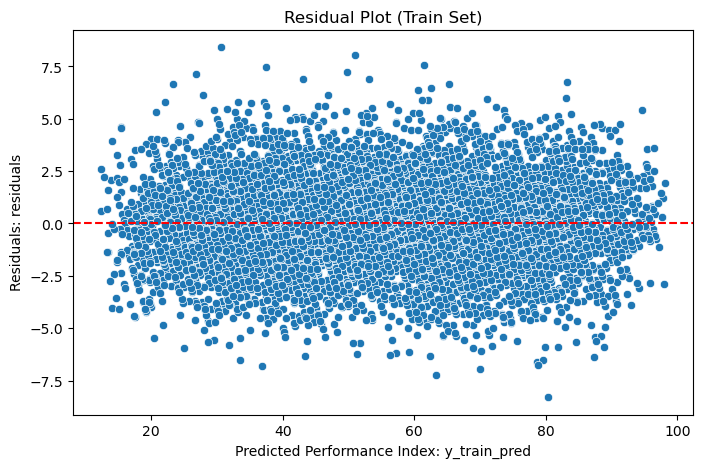

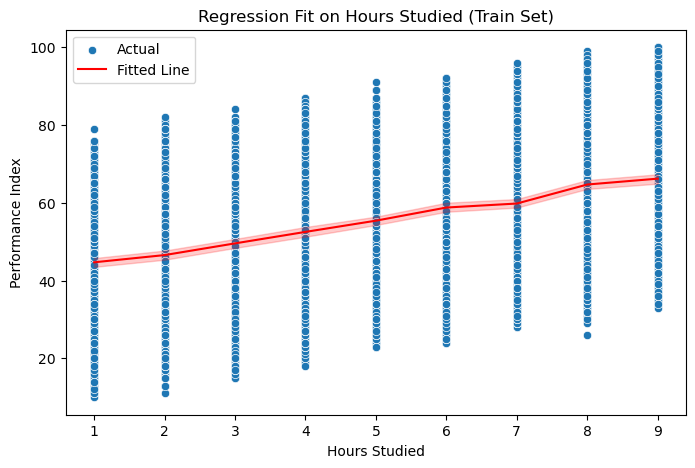

In [39]:
# Assignment 4
print("Assignment 4: -----------------")
features = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]
target = "Performance Index"
X = df[features]
y = df[target]
#  Add intercept to X (required for statsmodels)
X = sm.add_constant(X)
# 1. Split data train/test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train:\n", X_train.head())
print("-----")
print("X_test:\n", X_test.head())
print("-----")
print("y_train:\n", y_train.head())
print("-----")
print("y_test:\n", y_test.head())
# 2. Build model OLS based on train set
model = sm.OLS(y_train, X_train).fit()
print("Model summary:\n", model.summary())
# 3. Predict on train/test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# 5. Draw residual plot based on train set
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Performance Index: y_train_pred")
plt.ylabel("Residuals: residuals")
plt.title("Residual Plot (Train Set)")
plt.show()
# 6. Draw scatter plot of regression fit (based on train set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train["Hours Studied"], y=y_train, label="Actual")
sns.lineplot(
    x=X_train["Hours Studied"], y=y_train_pred, color="red", label="Fitted Line"
)
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Fit on Hours Studied (Train Set)")
plt.legend()
plt.show()